(1600, 1600)
[198 163  96 255]


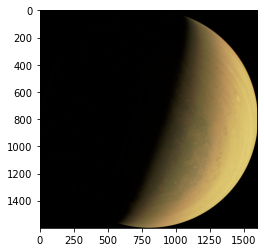

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

red = cv2.imread(r"C:\Users\yashs\Downloads\ImageSet\JNCE_2022272_45C00088_V01-red.png",0)
green = cv2.imread(r"C:\Users\yashs\Downloads\ImageSet\JNCE_2022272_45C00088_V01-green.png",0)
blue = cv2.imread(r"C:\Users\yashs\Downloads\ImageSet\JNCE_2022272_45C00088_V01-blue.png",0)

print(red.shape)

#alpha = np.ones(red.shape, dtype = red.dtype)*50

merged = cv2.merge((red, green, blue))

merged = cv2.cvtColor(merged, cv2.COLOR_RGB2RGBA)

print(merged[750,1400])

plt.imshow(merged)

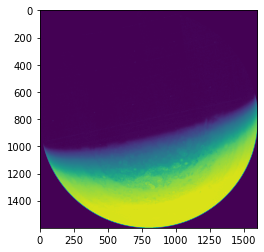

In [2]:
red1 = cv2.imread(r"C:\Users\yashs\Downloads\ImageSet\JNCE_2022229_44C00074_V01-red.png")
green1 = cv2.imread(r"C:\Users\yashs\Downloads\ImageSet\JNCE_2022229_44C00074_V01-green.png")
blue1 = cv2.imread(r"C:\Users\yashs\Downloads\ImageSet\JNCE_2022229_44C00074_V01-blue.png")

r = red1[:,:,2]
plt.imshow(r)

# g = green1[:,:,1]
# plt.imshow(g)

# b = blue1[:,:,0]
# plt.imshow(b)

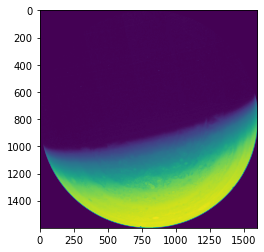

In [3]:
g = green1[:,:,1]
plt.imshow(g)

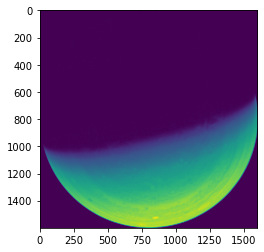

In [4]:
b = blue1[:,:,0]
plt.imshow(b)

[ 17  15   6 255]


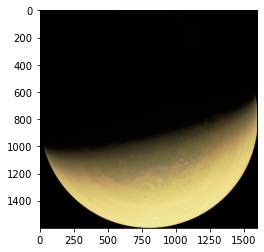

In [5]:
merge = cv2.merge((r, g, b))

print(merged[750,1400])

plt.imshow(merged)

(1600, 1600, 4)


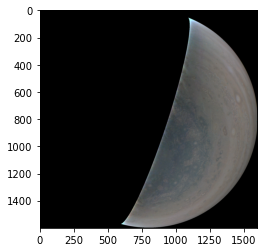

In [4]:
map_image = cv2.imread(r"C:\Users\yashs\Downloads\ImageSet\JNCE_2022272_45C00088_V01-mapprojected.png")
map_image = cv2.cvtColor(map_image, cv2.COLOR_BGR2RGBA)
print(map_image.shape)
plt.imshow(map_image)

In [7]:
#merge = cv2.cvtColor(merge, cv2.COLOR_RGB2GRAY)

(1600, 1600, 4)


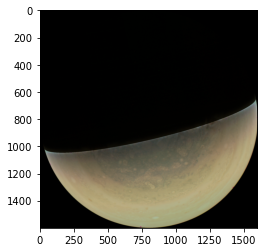

In [109]:
final = cv2.addWeighted(map_image,0.5,merged,0.5,0)
print(final.shape)
plt.imshow(final)

# Resizing Images

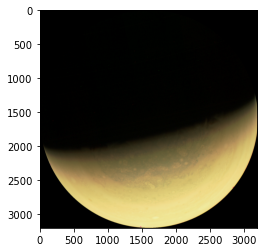

In [9]:
resized = cv2.resize(merged, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(resized)

In [10]:
merged_img = cv2.merge((red1, green1, blue1))
print(merged_img.shape)

(1600, 1600, 9)


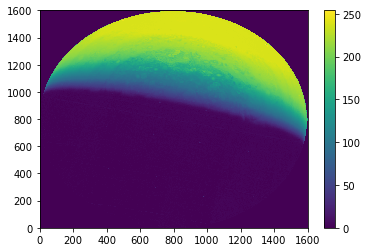

In [8]:
plt.pcolormesh(merged_img[:,:,1])
plt.colorbar()

# Contrast and Brightness

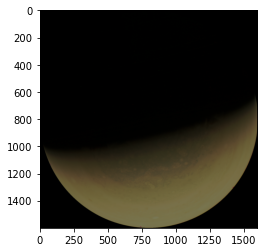

In [31]:
merged_new = np.zeros(merge.shape,merge.dtype)

contrast = 0.5
brightness = 0

for x in range(merge.shape[0]):
    for y in range(merge.shape[1]):
        for z in range(merge.shape[2]):
            merged_new[x,y,z] = np.clip(contrast*merge[x,y,z] + brightness,0,255)

plt.imshow(merged)
plt.imshow(merged_new)

# Blending Images

In [9]:
!pip install blend_modes

In [5]:
from blend_modes import *

In [11]:
# merged = cv2.cvtColor(merged, cv2.COLOR_RGB2GRAY)
# map_image = cv2.cvtColor(map_image, cv2.COLOR_BGR2GRAY)

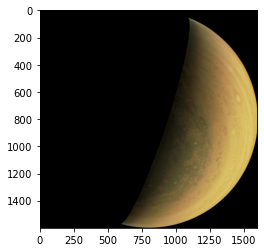

In [6]:
opacity = 1.0

merged = merged.astype(float)
map_image = map_image.astype(float)

blended = soft_light(merged, map_image, opacity)

blended = blended.astype(np.uint8)

plt.imshow(blended)

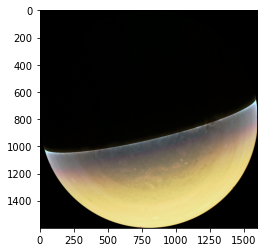

In [111]:
blended = lighten_only(merged, map_image, opacity)

blended = blended.astype(np.uint8)

plt.imshow(blended)

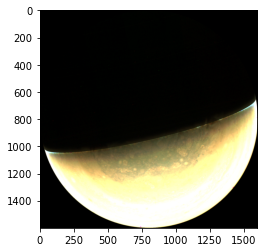

In [112]:
blended_1 = dodge(merged, map_image, opacity)

blended_1 = blended_1.astype(np.uint8)

plt.imshow(blended_1)

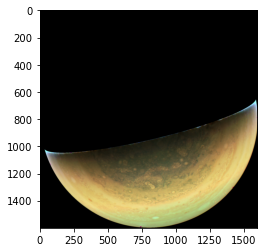

In [113]:
blended_2 = hard_light(merged, map_image, opacity)

blended_2 = blended_2.astype(np.uint8)

plt.imshow(blended_2)

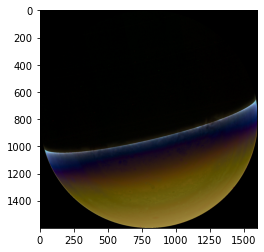

In [114]:
blended_3 = difference(merged, map_image, opacity)

blended_3 = blended_3.astype(np.uint8)

plt.imshow(blended_3)

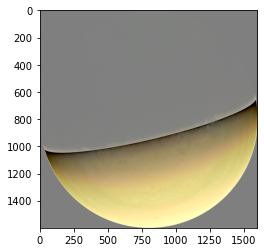

In [115]:
blended_4 = grain_extract(merged, map_image, opacity)

blended_4 = blended_4.astype(np.uint8)

plt.imshow(blended_4)

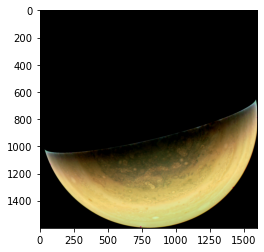

In [116]:
blended_5 = grain_merge(merged, map_image, opacity)

blended_5 = blended_5.astype(np.uint8)

plt.imshow(blended_5)

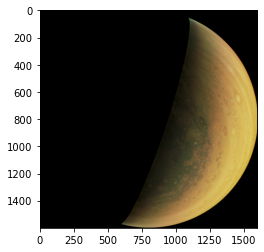

In [7]:
blended_6 = overlay(merged, map_image, opacity)

blended_6 = blended_6.astype(np.uint8)

plt.imshow(blended_6)

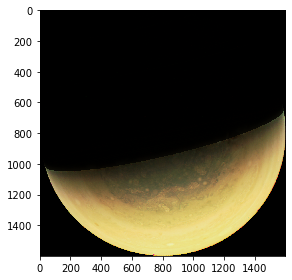

In [22]:
from skimage import io

io.imshow(blended_6)
io.show()

In [24]:
blended_6 = cv2.cvtColor(blended_6, cv2.COLOR_RGB2BGR)
cv2.imshow("Blended 6", blended_6)
cv2.waitKey(0)

-1

In [25]:
cv2.imshow("Red", red)
cv2.waitKey(0)

-1

In [8]:
blended_6 = cv2.cvtColor(blended_6, cv2.COLOR_RGB2BGR)
cv2.imwrite("saved_6(LATEST).png",blended_6)

True

In [ ]:
# def rgb_combine(img_path_1, img_path_2, img_path_3):
#     counter = 0
#     red = cv2.imread(img_path_1,0)
#     green = cv2.imread(img_path_2,0)
#     blue = cv2.imread(img_path_3,0)
#     merged = cv2.merge((red, green, blue))
#     merged = cv2.cvtColor(merged, cv2.COLOR_RGB2RGBA)
#     directory =
#     os.chdir(directory)
#     cv2.imwrite(f"rgb{counter}",merged)
#     counter += 1

# Functions

In [79]:
gaussian_img = cv2.GaussianBlur(blended_6, (3,3), 0, borderType = cv2.BORDER_CONSTANT)

cv2.imwrite("gaussianb.png", gaussian_img)

True

(array([5.14994e+06, 5.51980e+04, 2.83290e+04, 2.28970e+04, 5.78500e+03,
        8.89800e+03, 7.78800e+03, 1.65080e+04, 1.35080e+04, 1.85410e+04,
        2.10100e+04, 1.62820e+04, 3.20630e+04, 2.90430e+04, 4.23660e+04,
        2.69560e+04, 3.73990e+04, 2.44050e+04, 4.03170e+04, 2.46170e+04,
        3.44700e+04, 3.31430e+04, 2.16890e+04, 3.09390e+04, 2.07470e+04,
        3.33250e+04, 2.13650e+04, 3.26010e+04, 2.02780e+04, 3.53900e+04,
        3.76710e+04, 2.72180e+04, 4.06290e+04, 2.76520e+04, 4.05400e+04,
        2.53840e+04, 3.91280e+04, 2.32200e+04, 3.43740e+04, 2.09630e+04,
        3.36470e+04, 3.57410e+04, 2.22360e+04, 3.24400e+04, 2.08410e+04,
        3.01700e+04, 2.12640e+04, 3.33710e+04, 2.38630e+04, 3.86920e+04,
        4.37480e+04, 3.17290e+04, 4.66000e+04, 2.61820e+04, 3.25230e+04,
        1.89550e+04, 2.41970e+04, 1.30380e+04, 1.61590e+04, 1.01120e+04,
        1.41170e+04, 1.33780e+04, 8.62300e+03, 1.24270e+04, 8.56000e+03,
        1.28260e+04, 9.09500e+03, 1.35240e+04, 1.00

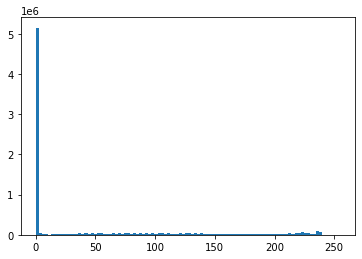

In [119]:
from skimage import img_as_ubyte
gaussian_img = img_as_ubyte(gaussian_img)
plt.hist(gaussian_img.flat, bins = 100, range = (0,255))

(array([9.6630e+03, 5.4810e+03, 1.1205e+04, 1.0042e+04, 1.9974e+04,
        1.2064e+04, 1.9972e+04, 1.5328e+04, 2.8384e+04, 2.7060e+04,
        2.8401e+04, 4.2196e+04, 2.5270e+04, 3.6849e+04, 2.6349e+04,
        3.8719e+04, 2.4668e+04, 3.3184e+04, 2.2168e+04, 2.1689e+04,
        3.0939e+04, 2.0747e+04, 3.3325e+04, 2.1365e+04, 3.2601e+04,
        2.0278e+04, 3.5390e+04, 2.4935e+04, 3.9954e+04, 2.7521e+04,
        2.6470e+04, 4.2266e+04, 2.5425e+04, 3.8493e+04, 2.4967e+04,
        3.4627e+04, 2.1664e+04, 3.2740e+04, 2.2861e+04, 2.4244e+04,
        3.3209e+04, 2.1467e+04, 3.1077e+04, 1.9934e+04, 3.2097e+04,
        2.2538e+04, 3.6471e+04, 2.6084e+04, 4.3748e+04, 3.1729e+04,
        3.2348e+04, 4.0434e+04, 2.2709e+04, 2.8769e+04, 1.6813e+04,
        2.0422e+04, 1.1015e+04, 1.5256e+04, 9.3150e+03, 9.4660e+03,
        1.3107e+04, 8.4220e+03, 1.2471e+04, 8.5870e+03, 1.2950e+04,
        9.1970e+03, 1.4041e+04, 1.0326e+04, 1.8140e+04, 1.3465e+04,
        1.3619e+04, 2.2368e+04, 1.4080e+04, 2.15

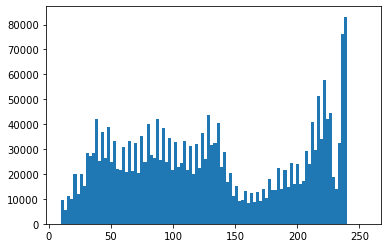

In [120]:
plt.hist(gaussian_img.flat, bins = 100, range = (10,255))

In [ ]:
# def gaussian_blur(img_path):
#     counter = 0
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA) 
#     gaussian_img = cv2.GaussianBlur(img, (3,3), 0, borderType = cv2.BORDER_CONSTANT)
#     cv2.imwrite(f"gaussianblur{counter}.png", gaussian_img)
#     counter += 1

In [80]:
median_img = cv2.medianBlur(blended_6, 3)

cv2.imwrite("medianb.png", median_img)

True

In [ ]:
# def median_blur(img_path):
#     counter = 0
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)      
#     median_img = cv2.medianBlur(img, 3)
#     cv2.imwrite(f"medianblur{counter}.png", median_img)
#     counter += 1

In [81]:
bilateral_img = cv2.bilateralFilter(blended_6, 5, 20, 100, borderType = cv2.BORDER_CONSTANT)

cv2.imwrite("bilateral.png", bilateral_img)

True

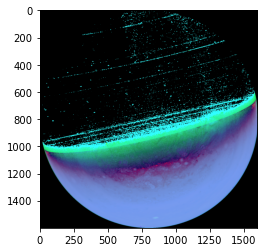

In [124]:
gaussian_hsv = cv2.cvtColor(gaussian_img, cv2.COLOR_RGB2HSV)
plt.imshow(gaussian_hsv)

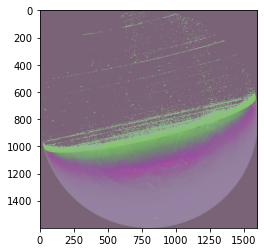

In [127]:
gaussian_img = cv2.cvtColor(gaussian_img, cv2.COLOR_RGB2Lab)
plt.imshow(gaussian_img)

In [ ]:
from blend_modes import *

def blending_softlight(img_path_1,mask_img_path, opacity):
    counter = 0
    merged = cv2.imread(img_path_1)
    merged = cv2.cvtColor(merged, cv2.COLOR_RGB2RGBA)
    map_image = cv2.imread(mask_img_path)
    map_image = cv2.cvtColor(map_image, cv2.COLOR_RGB2RGBA)
    merged = merged.astype(float)
    map_image = map_image.astype(float)
    blended = soft_light(merged, map_image, opacity)
    blended = blended.astype(np.uint8)
    directory =
    os.chdir(directory)
    cv2.imwrite(f"blended_soflight{counter}.png", bended)
    counter += 1

In [106]:
from os import listdir
directory = "D:\\img_test_download"
for images in os.listdir(directory):
    if(images.endswith("red.png")):
        img_path_red = directory + "\\" + images
        print(images)
        print(img_path_red)

JNCE_2022229_44C00074_V01-red.png
D:\img_test_download\JNCE_2022229_44C00074_V01-red.png
